In [1]:
# install.packages("tidymodels")
# install.packages("infer")
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(tidymodels))
suppressPackageStartupMessages(library(repr))
suppressPackageStartupMessages(library(infer))
suppressPackageStartupMessages(library(GGally))
options(repr.matrix.max.rows = 6)
options(repr.plot.width = 6, repr.plot.height = 6)
set.seed(100)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


## Climate Change: Study temperature and precipitation in historical vs contemporary weather records   
**STAT 201  Project Proposal - Group 17  
Date:         March 03, 2022**

## Introduction

Climate change refers to long-term shifts in temperatures and weather patterns (United Nations, n.d.-b). Although the main cause for climate change varies from the rising concentration of greenhouse gases in the atmosphere to periodical change in solar activities and remains controversial, the effects of climate change are more universally observed. United Nations (n.d.-a) summarizes the effects of climate change as: hotter temperatures, more severe storms, increased drought, etc. Our group intends to obtain data from a Canadian weather station and to study the presence of these effects of climate change from some historical years to the present.  

The Canadian Climate and Weather Database provides weather records from numerous weather stations across Canada. Each weather station contains weather records in hourly, daily, and monthly formats. In order to obtain a meaningful and relatively large time span, the group queried stations with data available between 1950 and 2022. The query returned 8796 weather stations, from which, the group randomly selected **ABBOTSFORD A** weather station in BC to use for this study (Historical Data, 2021, November 25).  

The group intends to choose daily temperature and daily precipitation as the random variable across two categories - historical vs contemporary. In both variables, the group chooses to study the parameter mean. We believe that the difference in mean in daily temperature and precipitation can aid us to study the claimed effect of climate change: hotter temperature and increased drought (United Nations, n.d.-a). Thus, this project aims to answer:

> Is there a significant difference in the weather record of the 1950s and the 2000s in terms of temperature and precipitation? 


## Preliminary Results

### Data Importing, Cleaning, and Wrangling
  
We first downloaded and imported daily data from 1950 to 1969 and 2000 to 2019.

In [2]:
climate_1950 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_1950_P1D.csv", show_col_types = FALSE)
climate_1951 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_1951_P1D.csv", show_col_types = FALSE)
climate_1952 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_1952_P1D.csv", show_col_types = FALSE)
climate_1953 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_1953_P1D.csv", show_col_types = FALSE)
climate_1954 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_1954_P1D.csv", show_col_types = FALSE)
climate_1955 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_1955_P1D.csv", show_col_types = FALSE)
climate_1956 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_1956_P1D.csv", show_col_types = FALSE)
climate_1957 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_1957_P1D.csv", show_col_types = FALSE)
climate_1958 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_1958_P1D.csv", show_col_types = FALSE)
climate_1959 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_1959_P1D.csv", show_col_types = FALSE)
climate_1960 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_1960_P1D.csv", show_col_types = FALSE)
climate_1961 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_1961_P1D.csv", show_col_types = FALSE)
climate_1962 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_1962_P1D.csv", show_col_types = FALSE)
climate_1963 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_1963_P1D.csv", show_col_types = FALSE)
climate_1964 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_1964_P1D.csv", show_col_types = FALSE)
climate_1965 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_1965_P1D.csv", show_col_types = FALSE)
climate_1966 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_1966_P1D.csv", show_col_types = FALSE)
climate_1967 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_1967_P1D.csv", show_col_types = FALSE)
climate_1968 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_1968_P1D.csv", show_col_types = FALSE)
climate_1969 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_1969_P1D.csv", show_col_types = FALSE)

climate_2000 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_2000_P1D.csv", show_col_types = FALSE)
climate_2001 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_2001_P1D.csv", show_col_types = FALSE)
climate_2002 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_2002_P1D.csv", show_col_types = FALSE)
climate_2003 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_2003_P1D.csv", show_col_types = FALSE)
climate_2004 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_2004_P1D.csv", show_col_types = FALSE)
climate_2005 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_2005_P1D.csv", show_col_types = FALSE)
climate_2006 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_2006_P1D.csv", show_col_types = FALSE)
climate_2007 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_2007_P1D.csv", show_col_types = FALSE)
climate_2008 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_2008_P1D.csv", show_col_types = FALSE)
climate_2009 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_2009_P1D.csv", show_col_types = FALSE)
climate_2010 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_2010_P1D.csv", show_col_types = FALSE)
climate_2011 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_2011_P1D.csv", show_col_types = FALSE)
climate_2012 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_2012_P1D.csv", show_col_types = FALSE)
climate_2012_2 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100031_2012_P1D_2.csv", show_col_types = FALSE)
climate_2013 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100031_2013_P1D.csv", show_col_types = FALSE)
climate_2014 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100031_2014_P1D.csv", show_col_types = FALSE)
climate_2015 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100031_2015_P1D.csv", show_col_types = FALSE)
climate_2016 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100031_2016_P1D.csv", show_col_types = FALSE)
climate_2017 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100031_2017_P1D.csv", show_col_types = FALSE)
climate_2018 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100031_2018_P1D.csv", show_col_types = FALSE)
climate_2019 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100031_2019_P1D.csv", show_col_types = FALSE)


Next, we combined the yearly data and mutated a column to indicate the recorded time. The data in the 1950-1969 are labeled as `historical` and 2000-2019 as `contemporary`. We further combined these two data frames to serve as the raw sample for this study.
      
The raw sample contains 31 variables of weather measurements in which we decided to use the following as our possible parameters: 
- `Year`: the year of the weather record 
- `Max Temp`: the maximum temperature of the day in degrees Celsius.
- `Min Temp`: the minimum temperature of the day in degrees Celsius.
- `Mean Temp`: average temperature of the day in degrees Celsius.
- `Total Rain`: total amount of rain of the day measured in millimetres.
- `Total Precip`: total amount of precipitation of the day measured in millimetres. 

The following codes demonstrate the steps of data cleaning and wrangling:


In [3]:
climate_historical <- 
    rbind(climate_1950, climate_1951, climate_1952, climate_1953, climate_1954, climate_1955, climate_1956, climate_1957, climate_1958, climate_1959, 
          climate_1960, climate_1961, climate_1962, climate_1963, climate_1964, climate_1965, climate_1966, climate_1967, climate_1968, climate_1969) %>%
    mutate(Category = as.factor("historical"))

climate_contemporary <- 
    rbind(climate_2000, climate_2001, climate_2002, climate_2003, climate_2004, climate_2005, climate_2006, climate_2007, climate_2008, climate_2009,
          climate_2010, climate_2011, climate_2012, climate_2012_2, climate_2013, climate_2014, climate_2015, climate_2016, climate_2017, climate_2018, climate_2019) %>%
    mutate(Category = as.factor("contemporary"))

climate_merge <- rbind(climate_historical, climate_contemporary) 

In [4]:
climate_sample <- climate_merge %>%
    select(Category, Year, "Max Temp (°C)", "Min Temp (°C)", 
           "Mean Temp (°C)", "Total Rain (mm)", "Total Precip (mm)") %>%
    rename("Max_Temp" = "Max Temp (°C)",
           "Min_Temp" = "Min Temp (°C)",
           "Mean_Temp" = "Mean Temp (°C)",
           "Total_Rain" = "Total Rain (mm)",
           "Total_Precip" = "Total Precip (mm)") %>%
    na.omit()

climate_sample

Category,Year,Max_Temp,Min_Temp,Mean_Temp,Total_Rain,Total_Precip
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
historical,1950,-2.2,-9.4,-5.8,0,2.5
historical,1950,-11.1,-15.6,-13.4,0,0.0
historical,1950,-11.1,-17.2,-14.2,0,3.8
⋮,⋮,⋮,⋮,⋮,⋮,⋮
contemporary,2019,9.6,3.3,6.5,0.0,0.0
contemporary,2019,8.1,4.3,6.2,3.4,3.4
contemporary,2019,11.1,6.0,8.6,39.9,39.9


*Table 1. Table of sample weather record at Abbotsford A weather station.*

### Preliminary Data Explore - Temperature

The United Nations (n.d.-a) states that the temperature in the recent decade is higher than last century. Is there enough evidence to support this claim? Can we see this claimed difference in Mean_Temp between historical and contemporary data in the sample weather records from the Abbotsford A weather station? We first subset the Mean_Temp data and start to answer this question with a box plot.

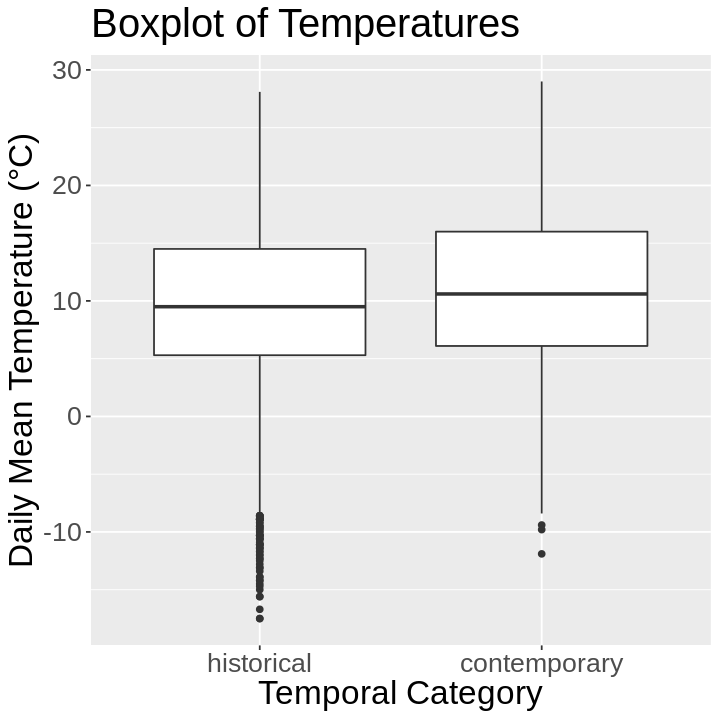

In [5]:
station_temp <- climate_sample %>%
    filter(!is.na(Mean_Temp)) %>%
    select(Category, Mean_Temp)
# station_temp

temp_boxplot <- station_temp %>%
    ggplot(aes(x = Category, y = Mean_Temp)) +
    geom_boxplot() +
    labs(x = "Temporal Category", y = "Daily Mean Temperature (°C)") +
    ggtitle("Boxplot of Temperatures") +
    theme(text = element_text(size = 20))
temp_boxplot

*Figure 1. Boxplot of daily mean temperature at Abbotsford A weather station*

From this boxplot, we can observe that there is a small difference in the median of daily `Mean_Temp` between the historical and contemporary weather records. However, is there a ***real*** difference in the mean of the daily temperature? We answer this question with two methods: Bootstrapping Simulation & Asymptotic.

### Hypothesis Testing - Temperature
$H_0$: There is no difference in the mean temperature between contemporary and historical data.  
$H_A$: There is a difference in the mean temperature between contemporary and historical data.   
Our initial hypothesis testing is conducted using simulation based permutation with the `infer` package. We chose a significant value of $\alpha$ = 0.05 as a standard value in the statistics field.  We first calculated the observed test statistic, then generated a simulation from the null distribution. We further obtained the P-value. The following codes demonstrate the steps:

Warning message:
“Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information.”


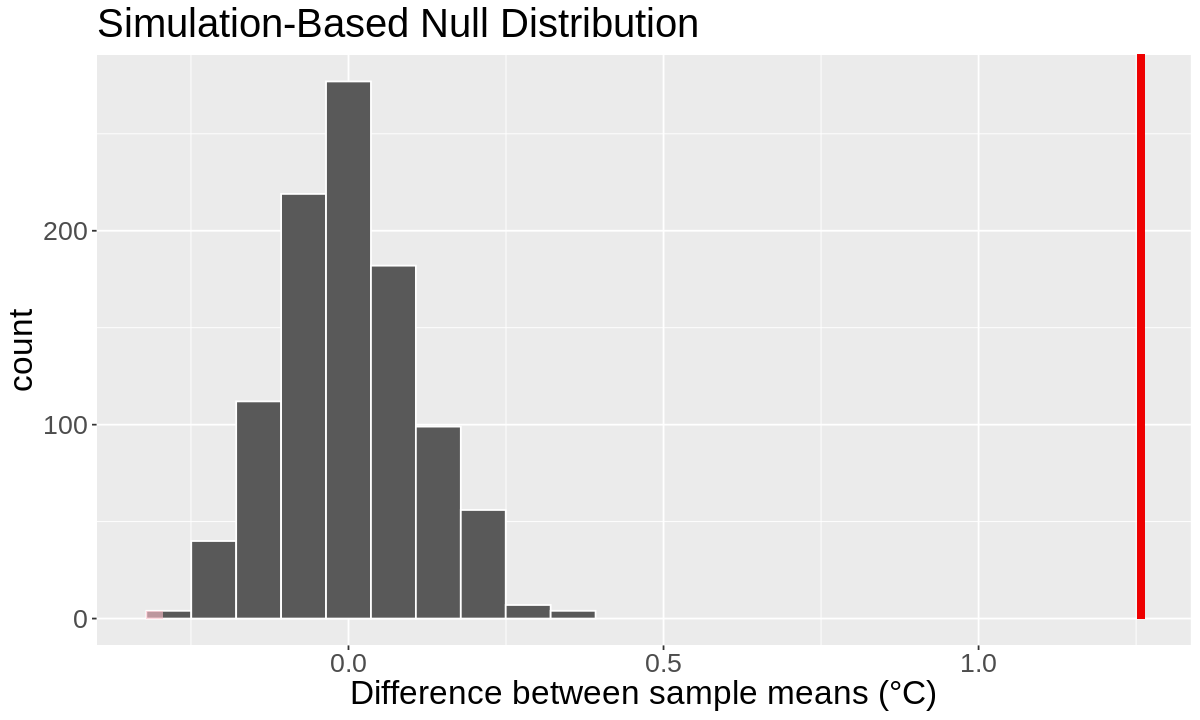

In [10]:
set.seed(100)
options(repr.plot.width = 10, repr.plot.height = 6)

obs_diff_in_temp <- station_temp %>%
    specify(formula = Mean_Temp ~ Category) %>%
    calculate(stat = "diff in means", order = c("contemporary", "historical"))

null_diff_in_temp <- station_temp %>%
    specify(formula = Mean_Temp ~ Category) %>%
    hypothesize(null = "independence") %>%
    generate(reps = 1000, type = "permute") %>%
    calculate(stat = "diff in means", order = c("contemporary", "historical"))

diff_in_temp_plot <- null_diff_in_temp %>%
    visualize(bins = 10) +
    shade_p_value(obs_stat = obs_diff_in_temp, direction = "both") +
    xlab("Difference between sample means (°C)") +
    theme(text = element_text(size = 20))
diff_in_temp_plot

p_value <- null_diff_in_temp %>%
    get_p_value(obs_stat = obs_diff_in_temp, direction = "both")

*Figure 5. Figure of simulation distribution and P-value of daily temperature hypothesis test.*

Notice that the red line in above graph indicates the observed difference in temperature, which is far out of the range of values generated by simulation under null hypothesis, suggesting that null hypothesis might possibly be rejected. To further prove this, we notice that the simulation returned a p-value of 0; however, we should never report a p-value of 0 because this suggests that making a Type I error is impossible. Since we used 1000 reps to calculate the sample, we conclude:  
>**The p-value is < 0.001, we reject the null hypothesis $H_0$ in favor of $H_A$ at the 5% significant level.**

We further computed the confidence interval of this observed test statistic with a 95% confidence interval using bootstrap method. 

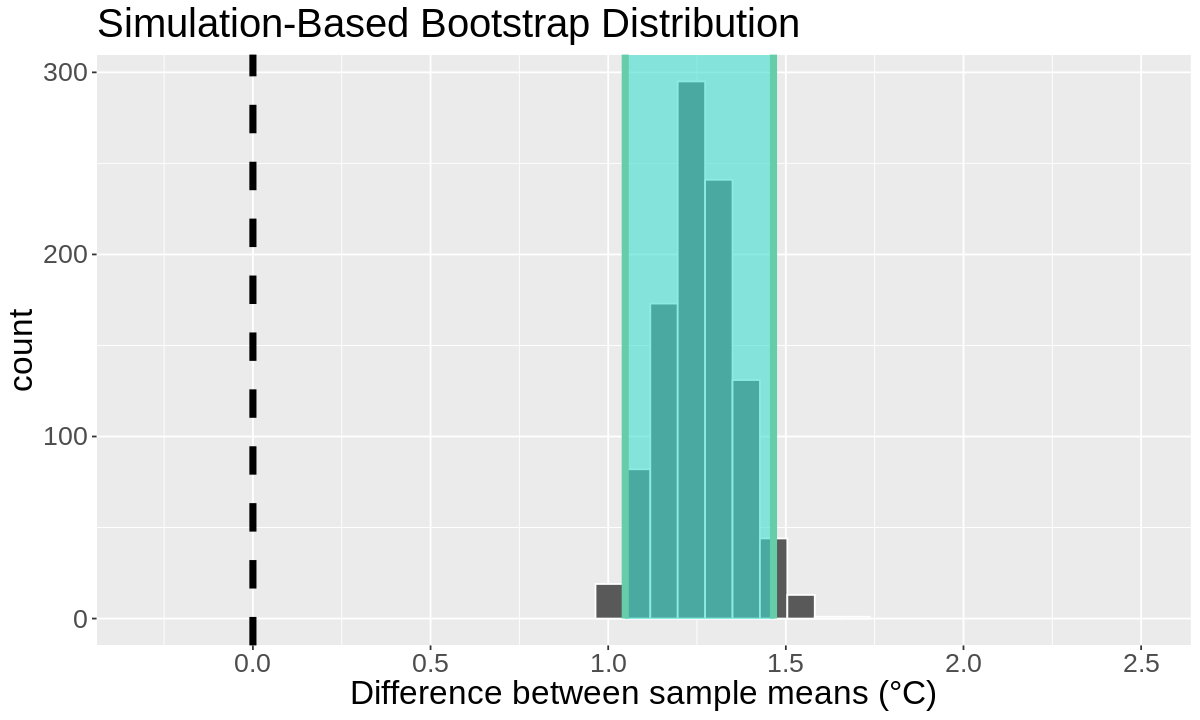

In [12]:
options(repr.plot.width = 10, repr.plot.height = 6)
set.seed(100)
diff_in_temp_bootstrap_dist <- station_temp %>%
    specify(formula = Mean_Temp ~ Category) %>%
    generate(reps = 1000, type = "bootstrap") %>%
    calculate(stat = "diff in means", order = c("contemporary", "historical"))

diff_in_temp_ci <- 
     diff_in_temp_bootstrap_dist %>% 
     get_confidence_interval(level = 0.95, type = "percentile")

diff_in_temp_ci_plot <- diff_in_temp_bootstrap_dist %>%
    visualize(bins = 10) +
    shade_ci(diff_in_temp_ci) +
    xlab("Difference between sample means (°C)") +
    scale_x_continuous(limits = c(-0.3, 2.5)) +
    geom_vline(xintercept = 0, size = 2, linetype = "dashed") +
    theme(text = element_text(size = 20))
diff_in_temp_ci_plot
# obs_diff_in_temp
# diff_in_temp_ci

*Figure 6. Figure of simulated bootstrap distribution of confidence interval of sample statistic.*

Notice that the value 0 is not included in our confidence interval, again suggesting that $\bar{x}_{contemporary}$ and $\bar{x}_{historical}$ are truly different.  

Table 3 summarizes the value we obtained for this test statistic.  95% confidence interval. 

| Test Statistic    | Observed Test Statistic |  p-value | Lower CI  |  Upper CI
| :----------: | :----------: | :----------: |:----------:| :---------:|
| $$\bar{x}_{contemporary} \;\;\;\; - \;\bar{x}_{historical}$$ |1.258 | <0.001|1.048|1.465|

<center><i>Table 3. Table of the estimates for test statistic difference in mean temperature.</i>

### Asymptotic Two Sample T-Test
The group further investigate the difference between mean temperature using the asymptotic method. 

In [14]:
temp_contemporary <- station_temp %>%
    filter(Category == "contemporary")

temp_historical <- station_temp %>%
    filter(Category == "historical")

temp_t_test <- tidy(
    t.test(temp_contemporary$Mean_Temp, temp_historical$Mean_Temp, alternative = "two.sided"))
temp_t_test

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1.257977,10.78897,9.530992,12.12236,1.169597e-33,14504.43,1.054568,1.461385,Welch Two Sample t-test,two.sided


We can see that the estimates of the difference in mean temperature between historical and contemporary data obtained from two sample t-test is very similar with the result we get from bootstrap simulation. The 95% confidence interval for the observed test statistic does not include 0 as well. 

| Test Statistic    | Observed Test Statistic |  p-value | Lower CI  |  Upper CI
| :----------: | :----------: | :----------: |:----------:| :---------:|
| $$\bar{x}_{contemporary} \;\;\;\; - \;\bar{x}_{historical}$$ |1.258 | <0.001|1.055|1.461|

<center><i>Table 4. Table of the estimates obtained from t-test for difference in mean temperature.</i>

Looking at the 95% confidence interval and the p-value for the observed test statistic from both bootstrap and t-test, we can conclude that the difference between historical and contemporary temperature is real. We further demonstrate the difference in their point estimates through bootstrapping. 

### Bootstrapping Simulation for Point Estimates - Temperature

From our hypothesis testing, we conclude that there is a difference between the two group's mean temperature. Now we are looking at the distribution of each group and we aim to explore how much they different by. 

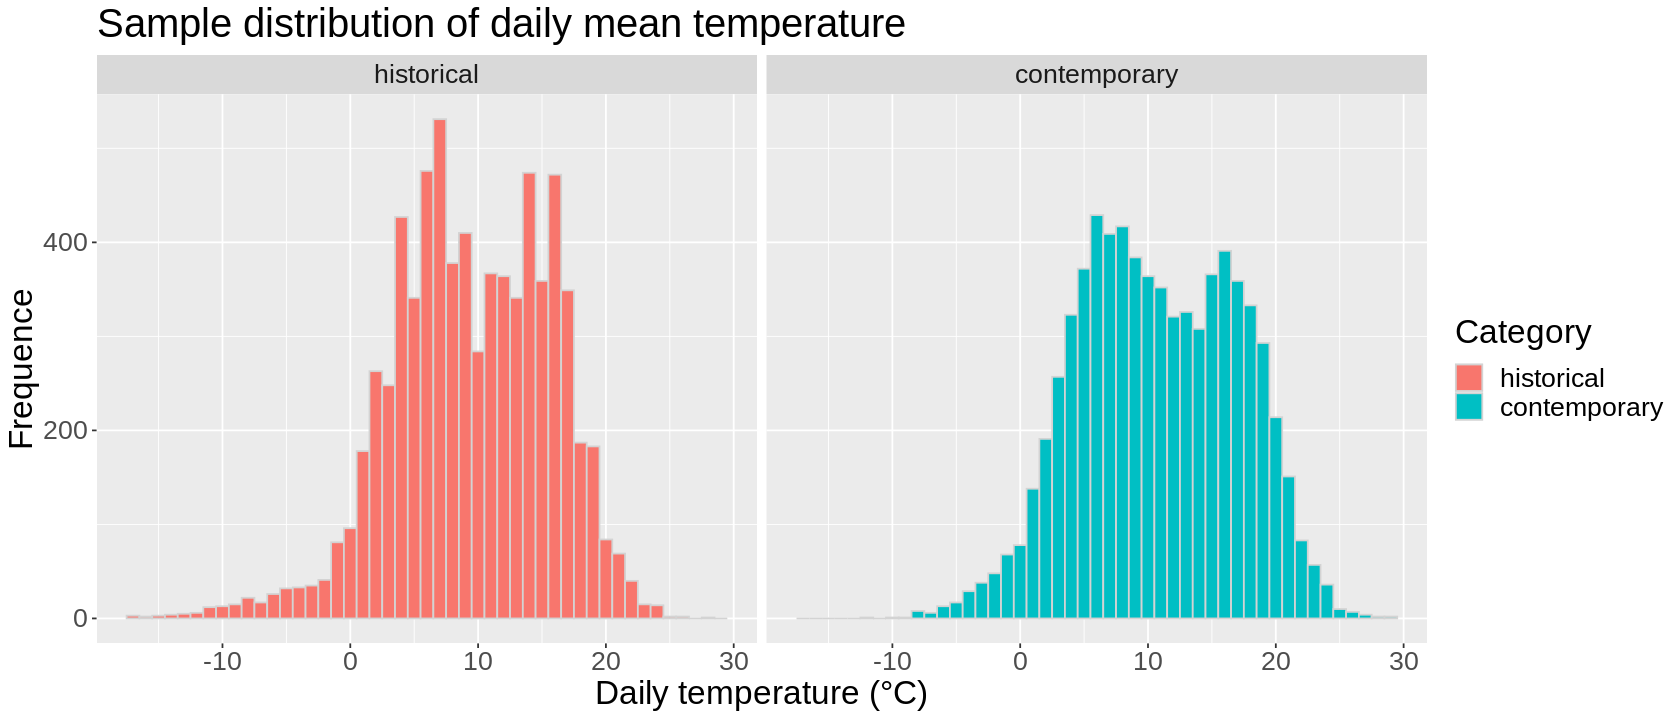

In [18]:
options(repr.plot.width = 14, repr.plot.height = 6)

station_temp_sample_distribution <- station_temp %>%
    ggplot(aes(x = Mean_Temp, fill = Category)) +
    geom_histogram(binwidth = 1, color = "lightgrey") +
    facet_grid(. ~ Category) +
    labs(x = "Daily temperature (°C)", y = "Frequence") +
    ggtitle("Sample distribution of daily mean temperature") +
    theme(text = element_text(size = 20))
station_temp_sample_distribution   

*Figure 2. Sample distribution of daily mean temperature at Abbotsford A weather station.*

We then used a bootstrap distribution to estimate the standard error in the point estimate and generated a 95% confidence interval for each point estimate. 

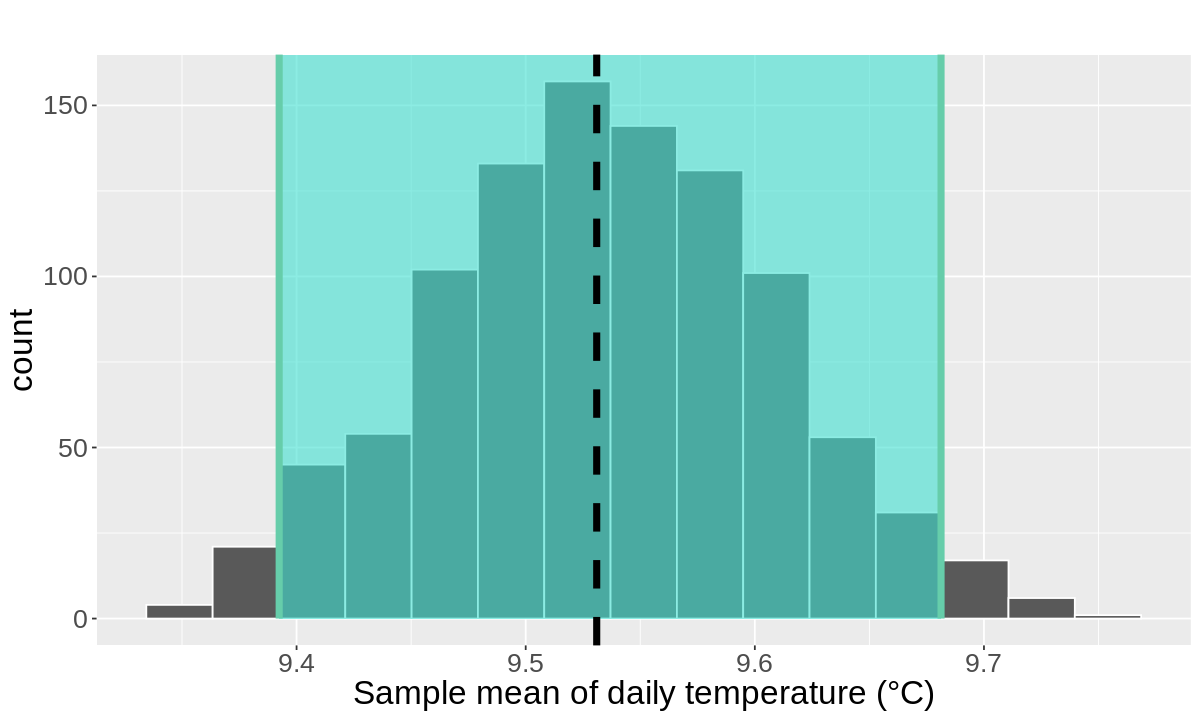

In [19]:
options(repr.plot.width = 10, repr.plot.height = 6)
set.seed(100)

temp_historical_mean <- temp_historical %>%
    summarize(mean = mean(Mean_Temp)) %>%
    pull()

temp_historical_bootstrap <- temp_historical %>%
    specify(response = Mean_Temp) %>%
    generate(reps = 1000, type = "bootstrap") %>%
    calculate(stat = "mean")

temp_historical_percentile_ci <- temp_historical_bootstrap %>%
    get_ci(level = 0.95, type = "percentile")

visualize(temp_historical_bootstrap, binwidth = 0.05) +
    shade_ci(endpoints = temp_historical_percentile_ci) +
    labs(title = "", x = "Sample mean of daily temperature (°C)") +
    geom_vline(xintercept = temp_historical_mean, size = 2, linetype = "dashed") +
    theme(text = element_text(size = 20))
# temp_historical_mean
# temp_historical_percentile_ci

*Figure 3. Bootstrap distribution of the historical sample means with 95% confidence interval.*

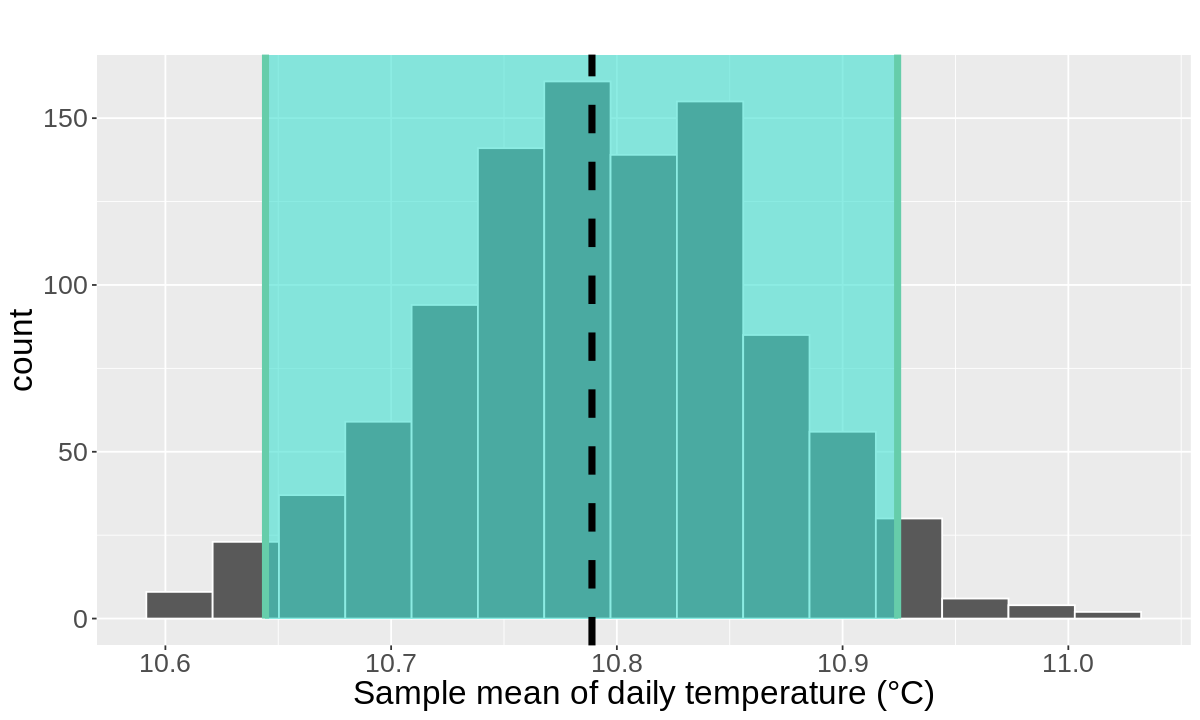

In [20]:
set.seed(100)
options(repr.plot.width = 10, repr.plot.height = 6)

temp_contemporary_mean <- temp_contemporary %>%
    summarize(mean = mean(Mean_Temp)) %>%
    pull()

temp_contemporary_bootstrap <- temp_contemporary %>%
    specify(response = Mean_Temp) %>%
    generate(reps = 1000, type = "bootstrap") %>%
    calculate(stat = "mean")

temp_contemporary_percentile_ci <- temp_contemporary_bootstrap %>%
    get_ci(level = 0.95, type = "percentile")

visualize(temp_contemporary_bootstrap, binwidth = 0.05) +
    shade_ci(endpoints = temp_contemporary_percentile_ci) +
    labs(title = "", x = "Sample mean of daily temperature (°C)") +
    geom_vline(xintercept = temp_contemporary_mean, size = 2, linetype = "dashed") +
    theme(text = element_text(size = 20))
# temp_contemporary_mean
# temp_contemporary_percentile_ci

*Figure 4. Bootstrap distribution of the contemporary sample means with 95% confidence interval.*

Table 2 summarizes the point estimate for each category and reports their 95% confidence interval. 

| Category    | Point Estimate $\bar{x}$  |  Lower CI  |  Upper CI
| :----------: | :----------: | :----------: |:----------:|
| historical|9.53|9.39|9.68
| contemporary|10.79|10.64|10.92

<center><i>Table 2. Table of the estimates for daily mean temperature.</i>    

And we interpret this as:
- If we repeated our sampling procedure a large number of times, we expect about 95% of the confidence intervals [9.39, 9.68] to capture the value of the population parameter $\mu$ - the mean of daily temperature from 1950 to 1969.  
- If we repeated our sampling procedure a large number of times, we expect about 95% of the confidence intervals [10.64, 10.92] to capture the value of the population parameter $\mu$ - the mean of daily temperature from 2000 to 2019. 

### Preliminary Data Explore - Precipitation

The United Nations (n.d.-a) states that due to climate change destructive storms have become more intense and more frequent in many regions. As temperatures rise, more moisture evaporates, which exacerbates extreme rainfall and flooding, causing more destructive storms.  
Can we see this claimed difference in yearly extreme rainfall between historical and contemporary data at Abbotsford A weather station? We first subset the Total_Rain data, obtain the highest yearly rainfall and visualize the sample with a box plot.

Year,Category,Total_Rain
<dbl>,<fct>,<dbl>
1950,historical,0
1950,historical,0
1950,historical,0
⋮,⋮,⋮
2019,contemporary,0.0
2019,contemporary,3.4
2019,contemporary,39.9


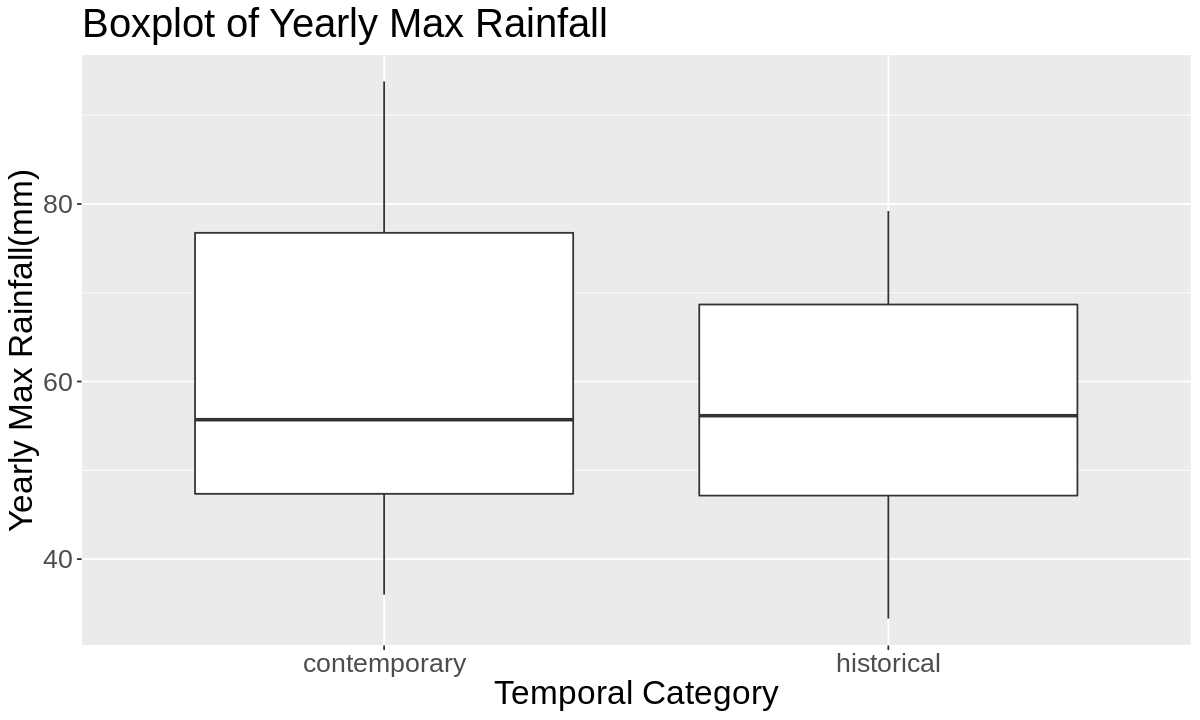

In [33]:
station_rain <- climate_sample %>%
    select(Year, Category, Total_Rain)

station_rain

station_rain_yearly_max <- station_rain %>%
   group_by(Year) %>%
   summarize(max_rain = max(Total_Rain)) %>%
   mutate(Category = as.factor(
       case_when(Year %in% c(1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969) ~ "historical", 
                 Year %in% c(2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019) ~ "contemporary")))

#station_rain_yearly_max 

rain_boxplot <- station_rain_yearly_max %>%
    ggplot(aes(x = Category, y = max_rain)) +
    geom_boxplot() +
    labs(x = "Temporal Category", y = "Yearly Max Rainfall(mm)") +
    ggtitle("Boxplot of Yearly Max Rainfall") +
    theme(text = element_text(size = 20))
rain_boxplot


*Figure*

It seems that rainfall are actually similar in between two groups. We visualize the sample distribution


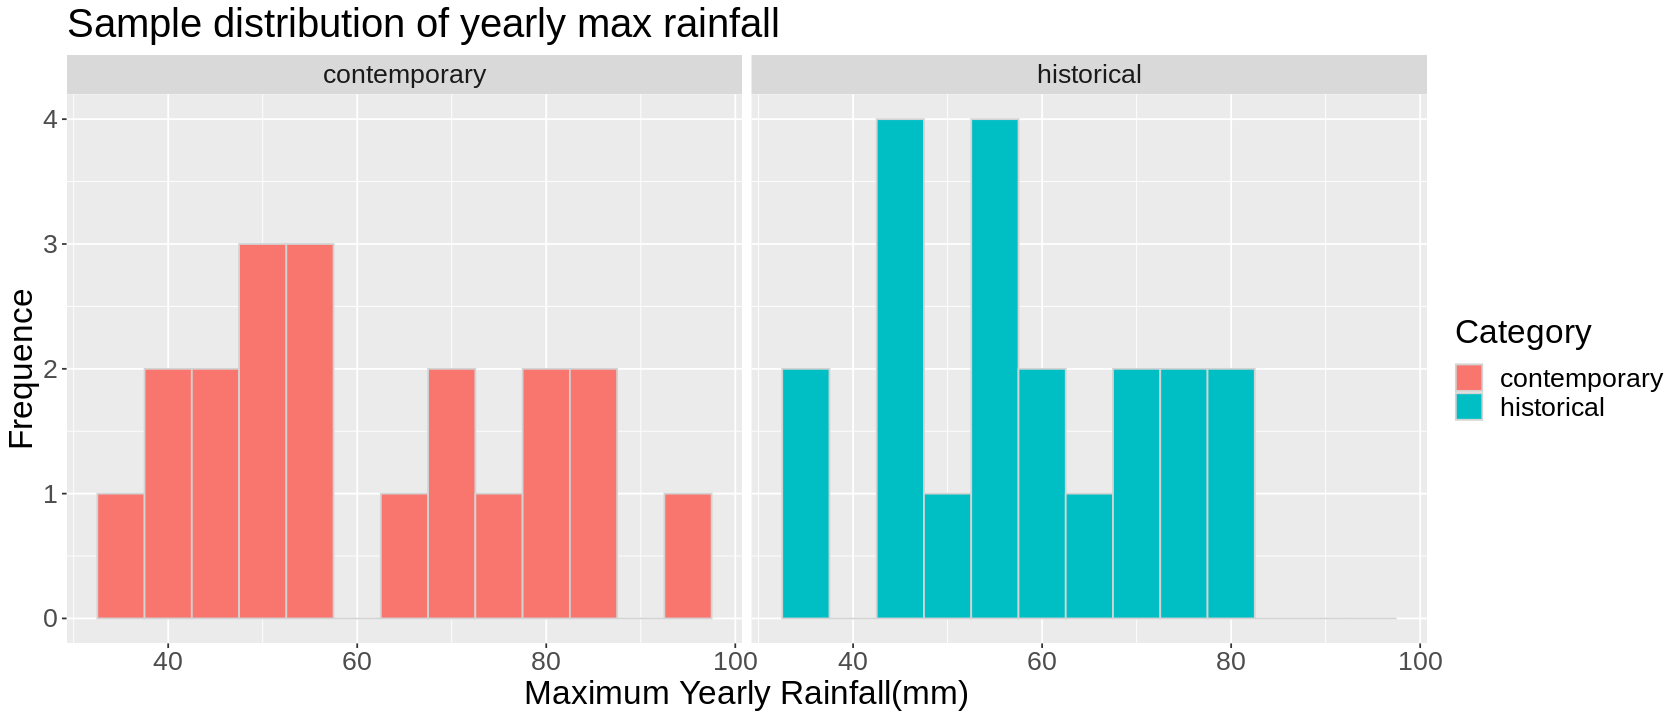

In [34]:
options(repr.plot.width = 14, repr.plot.height = 6)

station_temp_sample_distribution <- station_rain_yearly_max %>%
    ggplot(aes(x = max_rain, fill = Category)) +
    geom_histogram(binwidth = 5, color = "lightgrey") +
    facet_grid(. ~ Category) +
    labs(x = "Maximum Yearly Rainfall(mm)", y = "Frequence") +
    ggtitle("Sample distribution of yearly max rainfall") +
    theme(text = element_text(size = 20))
station_temp_sample_distribution   


We still decide to continue the hypothesis testing for the extreme yearly rainfall
### Hypothesis Testing - Extreme Rainfall
$H_0$: There is no difference in the mean of the maximum yearly rainfall between contemporary and historical data.  
$H_A$: There is a difference in the mean of the maximum yearly rainfall between contemporary and historical data.   
Our initial hypothesis testing is conducted using simulation based permutation with the `infer` package. We chose a significant value of $\alpha$ = 0.05 as a standard value in the statistics field.  We first calculated the observed test statistic, then generated a simulation from the null distribution. We further obtained the P-value. The following codes demonstrate the steps:

p_value
<dbl>
0.474


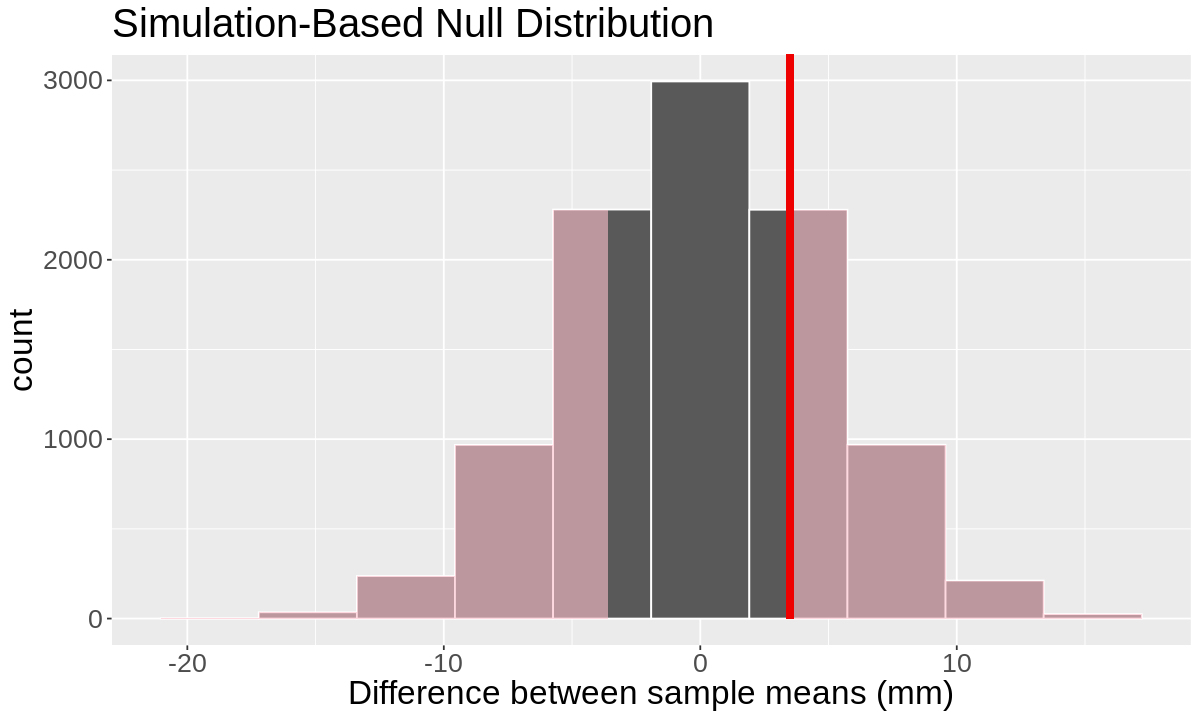

In [35]:
set.seed(100)
options(repr.plot.width = 10, repr.plot.height = 6)

obs_diff_in_rainfall <- station_rain_yearly_max %>%
    specify(formula = max_rain ~ Category) %>%
    calculate(stat = "diff in means", order = c("contemporary", "historical"))

null_diff_in_rainfall <- station_rain_yearly_max %>%
    specify(formula = max_rain ~ Category) %>%
    hypothesize(null = "independence") %>%
    generate(reps = 10000, type = "permute") %>%
    calculate(stat = "diff in means", order = c("contemporary", "historical"))

diff_in_rainfall_plot <- null_diff_in_rainfall %>%
    visualize(bins = 10) +
    shade_p_value(obs_stat = obs_diff_in_rainfall, direction = "both") +
    xlab("Difference between sample means (mm)") +
    theme(text = element_text(size = 20))
diff_in_rainfall_plot

p_value <- null_diff_in_rainfall %>%
    get_p_value(obs_stat = obs_diff_in_rainfall, direction = "both")
p_value

# a p_value of 0.474, we do not reject the null hypothesis 

*Figure*

We further computed the confidence interval of this test statistic with a 95% confidence interval.

lower_ci,upper_ci
<dbl>,<dbl>
-6.005252,13.008


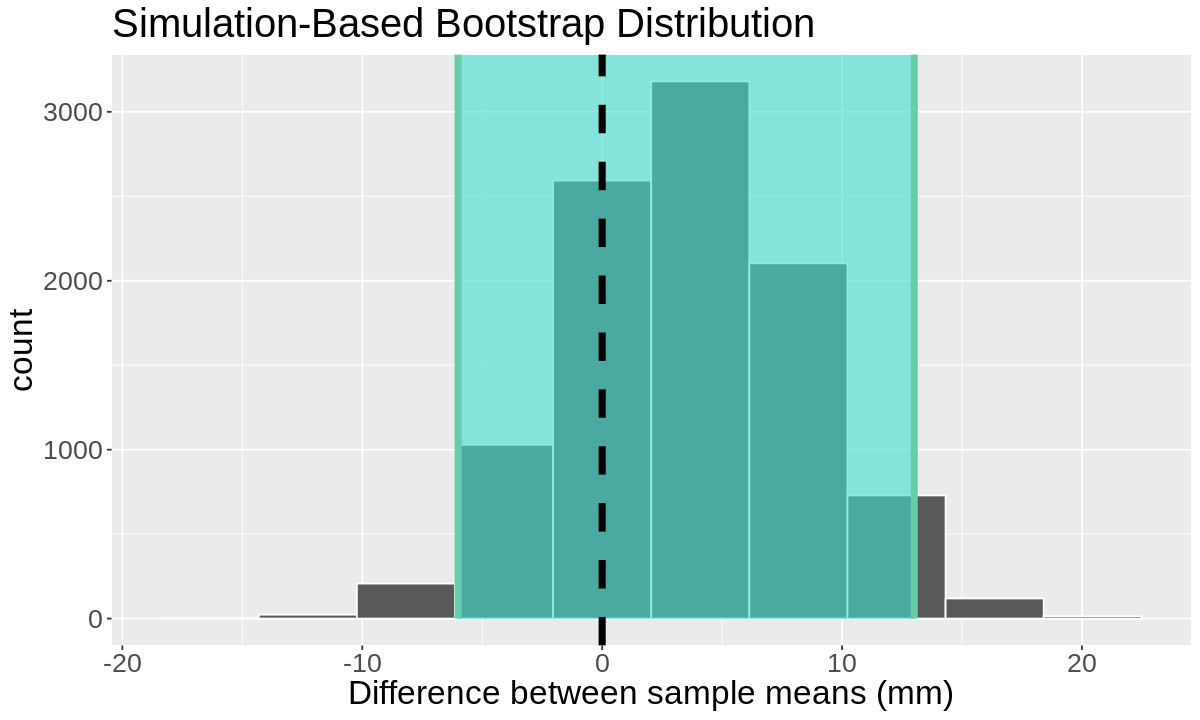

In [21]:
options(repr.plot.width = 10, repr.plot.height = 6)
set.seed(100)

diff_in_rainfall_bootstrap_dist <- station_rain_yearly_max %>%
    specify(formula = max_rain ~ Category) %>%
    generate(reps = 10000, type = "bootstrap") %>%
    calculate(stat = "diff in means", order = c("contemporary", "historical"))

diff_in_rainfall_ci <- 
     diff_in_rainfall_bootstrap_dist %>% 
     get_confidence_interval(level = 0.95, type = "percentile")

diff_in_rainfall_ci_plot <- diff_in_rainfall_bootstrap_dist %>%
    visualize(bins = 10) +
    shade_ci(diff_in_rainfall_ci) +
    xlab("Difference between sample means (mm)") +
    geom_vline(xintercept = 0, size = 2, linetype = "dashed") +
    theme(text = element_text(size = 20))
diff_in_rainfall_ci_plot 


diff_in_rainfall_ci

*Figure*

In [10]:
obs_diff_in_rainfall

stat
<dbl>
3.505


Notice that the value 0 **is** included in our confidence interval, suggesting that there is no significant difference between $\bar{x}_{contemporary}$ and $\bar{x}_{historical}$. 

Table **n** summarizes the value we obtained for this test statistic.  95% confidence interval. 

| Test Statistic    | Observed Test Statistic |  p-value | Lower CI  |  Upper CI
| :----------: | :----------: | :----------: |:----------:| :---------:|
| $\bar{x}_{contemporary}$   -   $\bar{x}_{historical}$|3.505 | 0.474 |-6.005|13.008|

<center><i>Table **n**. Table of the estimates for test statistic difference in yearly max rainfall.</i>

In [22]:
rain_contemporary <- station_rain_yearly_max %>%
    filter(Category == "contemporary") %>%
    pull(max_rain)
rain_historical <- station_rain_yearly_max %>%
    filter(Category == "historical")%>%
    pull(max_rain)

Max_rain_t_test <- tidy(t.test(x = rain_contemporary, y = rain_historical, alternative = "two.sided"))
Max_rain_t_test
# diff_in_rain_t_dist <- station_rain_yearly_max %>% 
#   specify(formula = max_rain ~ Category) %>% 
#   hypothesize(null = "independence") %>% 
#   generate(reps = 1000, type = "permute") %>% 
#   calculate(stat = "t", order = c("historical", "contemporary"))

# visualize(diff_in_rain_t_dist, bins = 10, method = "both") 

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
3.505,60.945,57.44,0.7113056,0.481427,36.41282,-6.48462,13.49462,Welch Two Sample t-test,two.sided


## Yearly Max Temperature

Year,max_temp,Category
<dbl>,<dbl>,<fct>
1950,32.2,historical
1951,35.6,historical
1952,34.4,historical
⋮,⋮,⋮
2017,36.4,contemporary
2018,35.6,contemporary
2019,31.9,contemporary


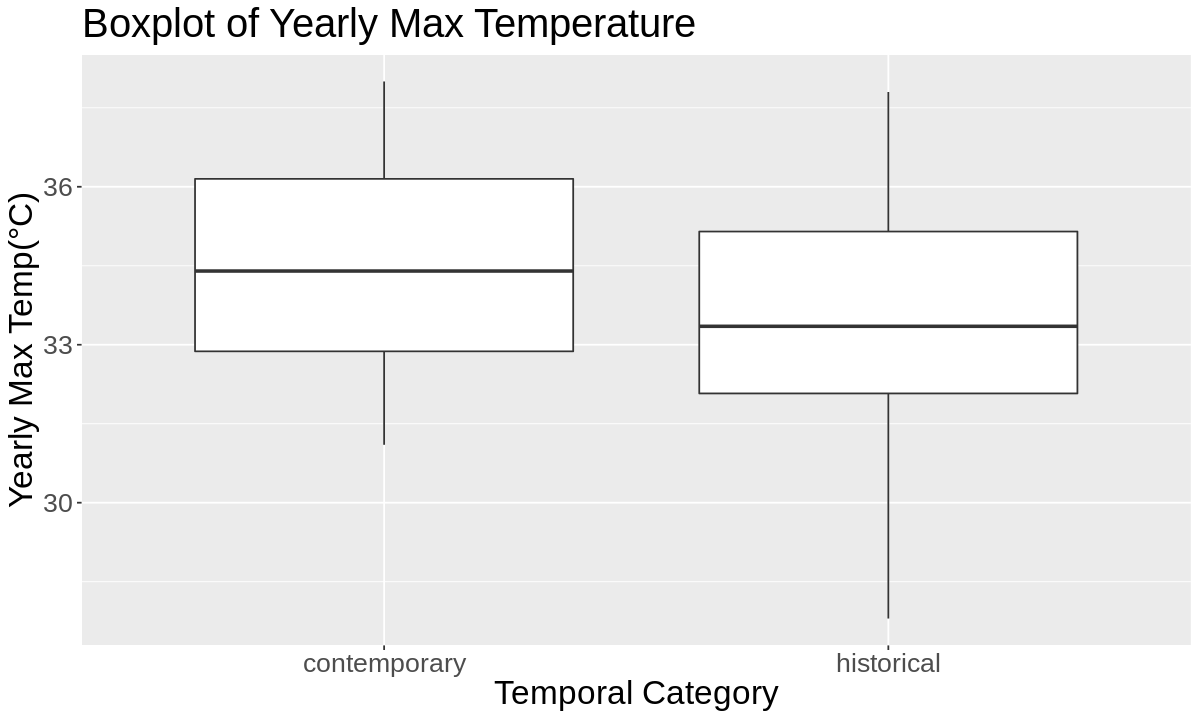

In [23]:

station_temp_max <- climate_sample %>%
    filter(!is.na(Mean_Temp)) %>%
    select(Category, Year, Max_Temp)


station_temp_yearly_max <- station_temp_max %>%
    group_by(Year) %>%
    summarize(max_temp = max(Max_Temp)) %>%
    mutate(Category = as.factor(
        case_when(Year %in% c(1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969) ~ "historical", 
                  Year %in% c(2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019) ~ "contemporary")))
    
station_temp_yearly_max

station_temp_yearly_max_boxplot <- station_temp_yearly_max %>%
    ggplot(aes(x = Category, y = max_temp)) +
    geom_boxplot() +
    labs(x = "Temporal Category", y = "Yearly Max Temp(°C)") +
    ggtitle("Boxplot of Yearly Max Temperature") +
    theme(text = element_text(size = 20))
station_temp_yearly_max_boxplot


### Hypothesis Testing - Extreme Temperature
$H_0$: There is no difference in the mean of the maximum yearly temperature between contemporary and historical data.  
$H_A$: There is a difference in the mean of the maximum yearly temperature between contemporary and historical data.
Our initial hypothesis testing is conducted using simulation based temperature with the infer package. We chose a significant value of  𝛼  = 0.05 as a standard value in the statistics field. We first calculated the observed test statistic, then generated a simulation from the null distribution. We further obtained the P-value. The following codes demonstrate the steps:

p_value
<dbl>
0.1856


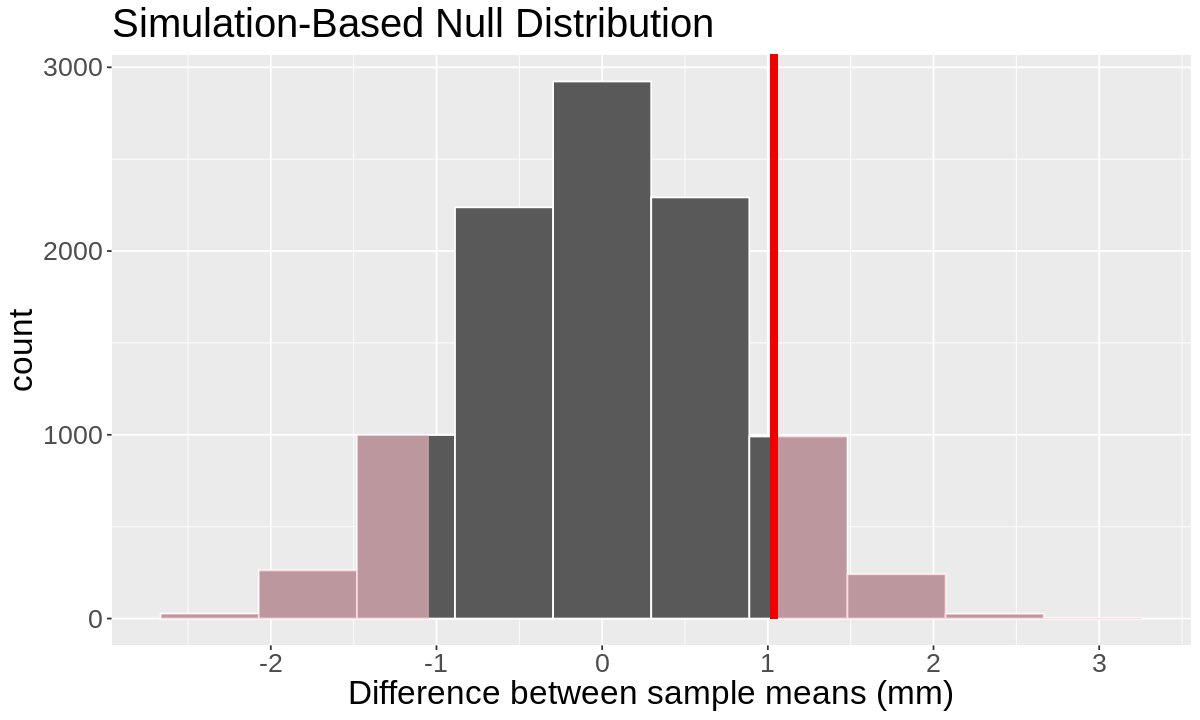

In [24]:
set.seed(100)
options(repr.plot.width = 10, repr.plot.height = 6)

obs_diff_in_temp <- station_temp_yearly_max %>%
    specify(formula = max_temp ~ Category) %>%
    calculate(stat = "diff in means", order = c("contemporary", "historical"))

null_diff_in_temp <- station_temp_yearly_max %>%
    specify(formula = max_temp ~ Category) %>%
    hypothesize(null = "independence") %>%
    generate(reps = 10000, type = "permute") %>%
    calculate(stat = "diff in means", order = c("contemporary", "historical"))

diff_in_temp_plot <- null_diff_in_temp %>%
    visualize(bins = 10) +
    shade_p_value(obs_stat = obs_diff_in_temp, direction = "both") +
    xlab("Difference between sample means (mm)") +
    theme(text = element_text(size = 20))
diff_in_temp_plot

p_value <- null_diff_in_temp %>%
    get_p_value(obs_stat = obs_diff_in_temp, direction = "both")
p_value
# p-value is 0.1856.

The p-value is 0.1856 and is larger than 0.05, therefore, we cannot reject the null hypothesis(There is no difference in the mean of the maximum yearly temperature between contemporary and historical data). We further computed the confidence interval of this test statistic with a 95% confidence interval.

lower_ci,upper_ci
<dbl>,<dbl>
-0.39445,2.557371


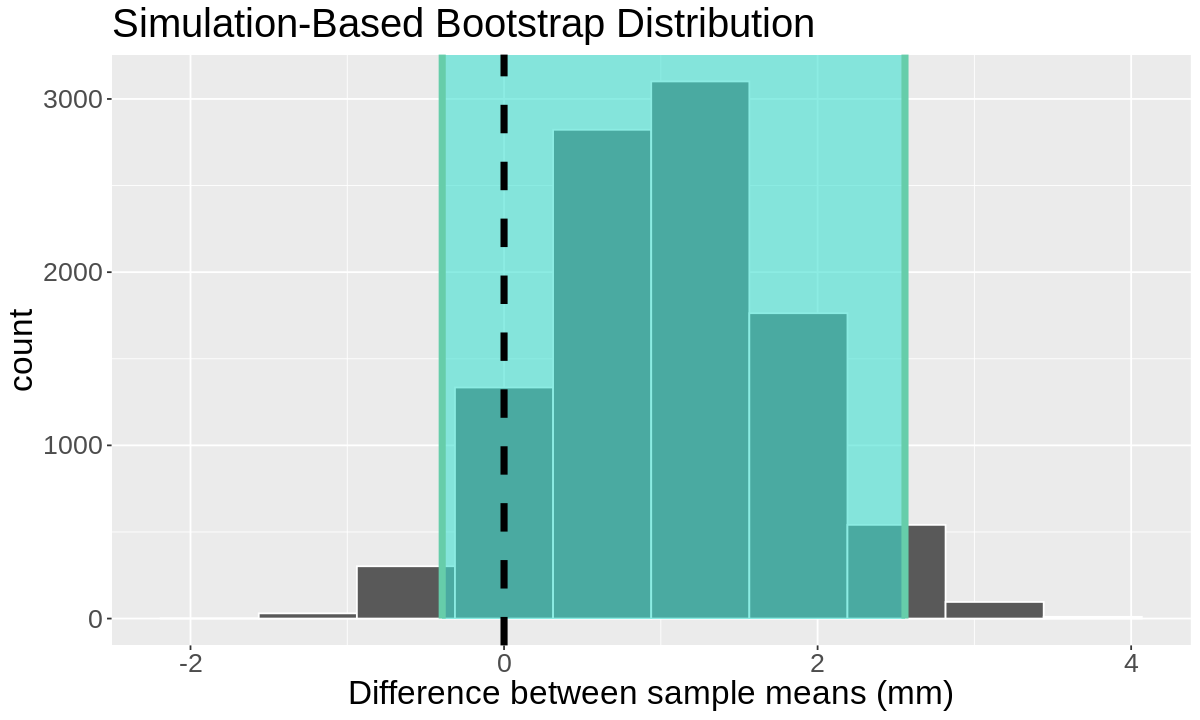

In [25]:
options(repr.plot.width = 10, repr.plot.height = 6)
set.seed(100)

diff_in_max_temp_bootstrap_dist <- station_temp_yearly_max %>%
    specify(formula = max_temp ~ Category) %>%
    generate(reps = 10000, type = "bootstrap") %>%
    calculate(stat = "diff in means", order = c("contemporary", "historical"))

diff_in_max_temp_ci <- 
     diff_in_max_temp_bootstrap_dist %>% 
     get_confidence_interval(level = 0.95, type = "percentile")

diff_in_max_temp_ci_plot <- diff_in_max_temp_bootstrap_dist %>%
    visualize(bins = 10) +
    shade_ci(diff_in_max_temp_ci) +
    xlab("Difference between sample means (mm)") +
    geom_vline(xintercept = 0, size = 2, linetype = "dashed") +
    theme(text = element_text(size = 20))
diff_in_max_temp_ci_plot 


diff_in_max_temp_ci

In [20]:
obs_diff_in_temp

stat
<dbl>
1.035


Notice that the value 0 **is** included in our confidence interval, suggesting that there is no significant difference between $\bar{x}_{contemporary}$ and $\bar{x}_{historical}$. 

Table **n** summarizes the value we obtained for this test statistic.  95% confidence interval. 

| Test Statistic    | Observed Test Statistic |  p-value | Lower CI  |  Upper CI
| :----------: | :----------: | :----------: |:----------:| :---------:|
| $\bar{x}_{contemporary}$   -   $\bar{x}_{historical}$| 1.035 | 0.1856 | -0.394 | 2.557 |

<center><i>Table **n**. Table of the estimates for test statistic difference in yearly max temperature.</i>

### Asymptotic Two Sample T-Test

In [21]:
historical_max_temp <- station_temp_yearly_max %>%
                            filter(Category == "historical") %>%
                            pull(max_temp)

contemporary_max_temp <- station_temp_yearly_max %>%
                            filter(Category == "contemporary") %>%
                            pull(max_temp)

max_temp_t_test <- 
    tidy(t.test(x = contemporary_max_temp,
                y = historical_max_temp,
                alternative = "two.sided"))

max_temp_t_test

Year,max_temp,Category
<dbl>,<dbl>,<fct>
1950,32.2,historical
1951,35.6,historical
1952,34.4,historical
⋮,⋮,⋮
2017,36.4,contemporary
2018,35.6,contemporary
2019,31.9,contemporary


estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1.035,34.37,33.335,1.34942,0.185442,36.81747,-0.5193417,2.589342,Welch Two Sample t-test,two.sided


## Methods - Plan

This study wishes to verify the claim of climate change effect from our weather record sample. Moving forward, the group intends to perform a similar analysis on precipitation data. At the first glance, we noticed that the majority of the values in the precipitation variable are zero, which brings the point estimate of the sample mean to a minimal level (close to zero) for both historical and contemporary categories. How to better utilize this dataset will be the next task the group plans to focus on. The group also plans to investigate the asymptotic method as a comparison to the simulation-based method for all the estimates.  
  
This study serves as an empirical analysis of climate change for the Abbotsford region and may impact how the municipalities plan to adjust their local agriculture industry facing the rising temperature and drought situation in the future.  
  
Can our study be generalized to a broader population outside of the Abbotsford region? What other dataset do we need to include for such generalization to be valid and meaningful? These are the questions for future studies to focus on. 

## Discussion
 
Summarize what you found, and the implications/impact of your findings.

According to the preliminary data visualization, we found out that there is a difference in mean temperature between historical and contemporary data sets. However, the medians were similar for yearly max precipitation although there were more extreme values in the contemporary data sets. We then performed hypothesis testing accordingly with a significance value of 0.05. Both simulation-based bootstrap and asymptotic t-test showed a similar result. 
We conclude that there is sufficient evidence that the true population parameter is significantly different from the specified value in which the observed test statistic of 1.258 showed that there is a rise in mean temperature. It may be a shred of evidence to support the statement that the climate is changing.

If relevant, discuss whether your results were what you expected to find.

The results align with our hypothesis that there is a difference in temperature. Blabla let me think think. 

Discuss future questions/research this study could lead to.

We would like to examine whether other stations may show similar/different results. There are many factors other than temperature and precipitation that may be interesting to observe climate change.


ERROR: Error in eval(expr, envir, enclos): object 'station_rain' not found


## Reference
  
Historical Data. (2021, November 25), Government of Canada, weather, climate and hazards. https://climate.weather.gc.ca/historical_data/search_historic_data_e.html  
  
United Nations. (n.d.-a), Causes and effects of climate change. https://www.un.org/en/climatechange/science/causes-effects-climate-change


United Nations. (n.d.-b), What is climate change? https://www.un.org/en/climatechange/what-is-climate-change

